In [1]:
!pip install librosa
!pip install IPython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [8]:
remix_file_path = "jazz.wav"

In [9]:
ipd.Audio(remix_file_path)

In [10]:
#load audio files with librosa
remix_file , sr = librosa.load(remix_file_path)

#basic info regarding audio

In [11]:
remix_file.shape

(746645,)

In [13]:
#duration in seconds of 1 sample
duration = 1/sr # sr = sampling rate or frame rate
print(f"One sample lasts for {duration:6f} seconds")


One sample lasts for 0.000045 seconds


In [14]:
#total number of samples in audio file
total_samples = len(remix_file)
print(f"Audio file is {total_samples} samples long")

Audio file is 746645 samples long


In [15]:
# duration of remix in seconds
total_duration = total_samples/sr
print(f"Audio file is {total_duration:.2f} seconds long")

Audio file is 33.86 seconds long


#Visualizing time domain of the audio signal


<ipython-input-21-399f42f936ea>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=remix_file, sr=sr, x_axis='time')


Text(0.5, 1.0, 'remix_file')

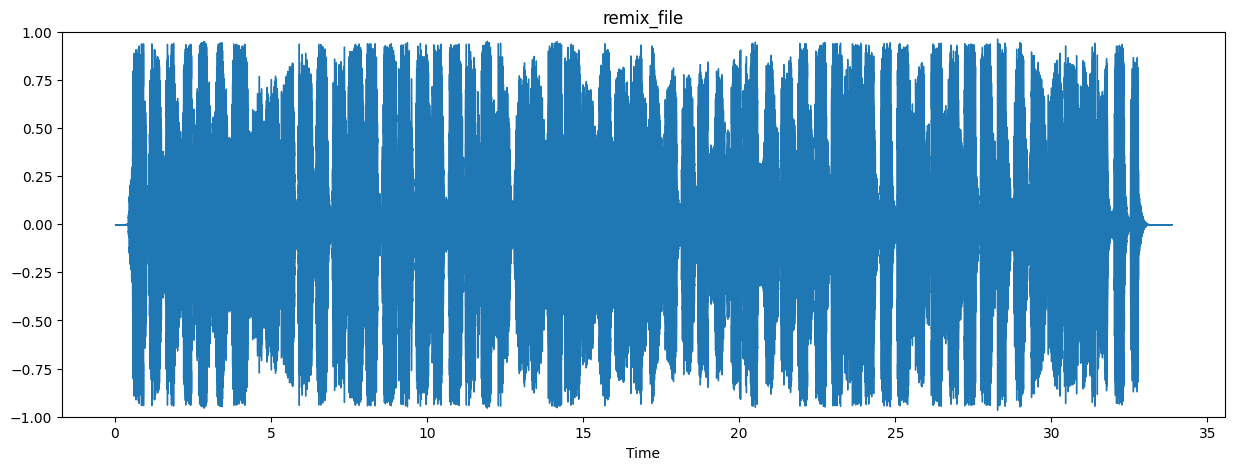

In [21]:
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
librosa.display.waveshow(y=remix_file, sr=sr, x_axis='time')
plt.title("remix_file")
plt.ylim((-1, 1))
plt.title("remix_file")

#calculating amplitude envelope

In [22]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
def calculate_amplitude_envelope(signal,frame_size,hop_length):
  amplitude_envelope = []
  # calculate amplitude envelope for each frame
  for i in range(0,len(signal),hop_length):
    current_frame = max(signal[i:i+frame_size])
    amplitude_envelope.append(current_frame)

  return np.array(amplitude_envelope)

  #another way of calculating AE
  def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])



In [23]:
#amplitude envelope
ae_remix = calculate_amplitude_envelope(remix_file,FRAME_SIZE,HOP_LENGTH)
#number of frames in amplitude envelope
len(ae_remix)

1459

#visualizing amplitude envelope of frames

In [27]:
frames = range(len(ae_remix))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH) #converting frames to time

<ipython-input-28-a99482df1de6>:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=remix_file, sr=sr, x_axis='time')


Text(0.5, 1.0, 'remix')

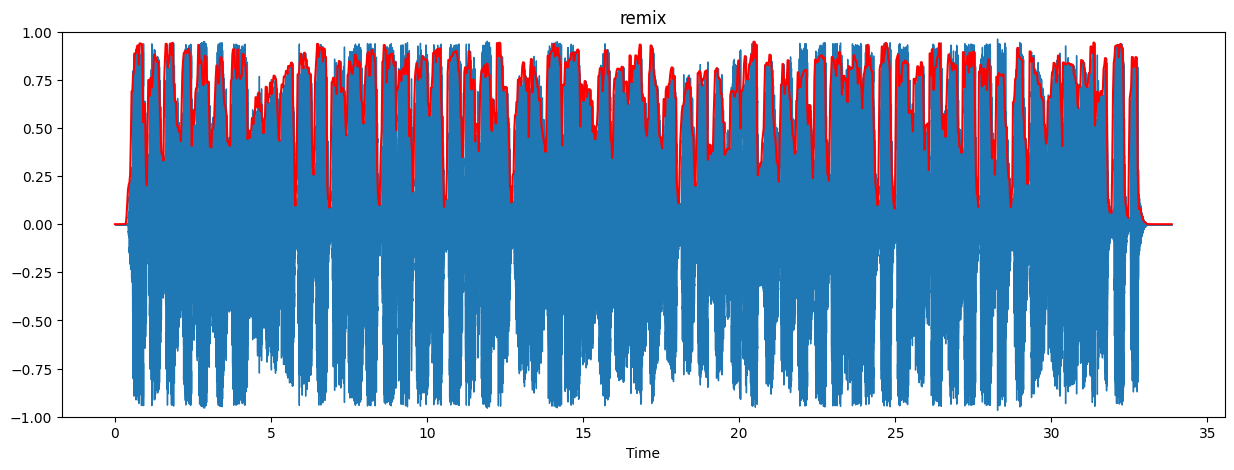

In [28]:
# amplitude envelope is graphed in red
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(y=remix_file, sr=sr, x_axis='time')
plt.plot(t, ae_remix, color="r")
plt.ylim((-1, 1))
plt.title("remix")